In [2]:
from matplotlib import pyplot as plt
import os
import numpy as np
import json


file_dir = "../outputs/12_26/"
model_list = ["Qwen/QwQ-32B-Preview", "Qwen/Qwen2.5-32B-Instruct", "Qwen/Qwen2.5-14B-Instruct", "Qwen/Qwen2.5-7B-Instruct", "Qwen/Qwen2.5-3B-Instruct", "Qwen/Qwen2.5-1.5B-Instruct", "mistralai/Mathstral-7B-v0.1", "Skywork/Skywork-o1-Open-Llama-3.1-8B"]

colors = ["red", "orange", "green", "blue", "purple", "pink", "brown", "gray", "black", "white"]

In [3]:
def gen_budget_list1(budget, data_name):
    # 注意有的模型性能比较好，在某些数据集上没跑完全部的budget
    if budget <0:
        return [-1]
    else: 
        if data_name == "gsm8k":
            budget_list = []
            for i in range(25, 501, 25):
                budget_list.append(i)
            # for i in range(500, 601, 50):
            #     budget_list.append(i)
        elif data_name == "math":
            budget_list = []
            for i in range(25, 951, 25):
                budget_list.append(i)
            # for i in range(1000, 1501, 50):
            #     budget_list.append(i)
        return budget_list

def gen_budget_list2(budget, data_name):
    # hard截断需要比step-by-step多25个token
    if budget <0:
        return [-1]
    else: 
        if data_name == "gsm8k":
            budget_list = []
            for i in range(50, 501, 25):
                budget_list.append(i)
            # for i in range(500, 601, 50):
            #     budget_list.append(i)
        elif data_name == "math":
            budget_list = []
            for i in range(50, 976, 25):
                budget_list.append(i)
            # for i in range(1000, 1501, 50):
            #     budget_list.append(i)
        return budget_list

In [4]:

prompt_type1 = "qwen25-step-by-step-hard"
prompt_type2 = "qwen25-math-cot"
prompt_type3 = "coarse-to-fine-qwen"
prompt_type4 = "mathstral-step-by-step-hard"
prompt_type5 = "mathstral-step-by-step"
prompt_type6 = "mathstral-coarse-to-fine"
prompt_type7 = "skywork-step-by-step-hard"
prompt_type8 = "skywork-step-by-step"
prompt_type9 = "skywork-coarse-to-fine"


dataset = "gsm8k"
something = "_-1_seed0_t0.0_s0_e-1"
budget_list1 = gen_budget_list1(1, dataset)
budget_list2 = gen_budget_list2(1, dataset)

In [5]:
acc_lists1 = []
acc_lists2 = []
acc_lists3 = []

for model in model_list:
    acc_list1 = []
    acc_list2 = []
    acc_list3 = []
    for budget in budget_list1:
        if model.startswith("Qwen"):
            file_name2 = "test_" + prompt_type2 + something + "_b" + str(int(budget)) + "_metrics.json"
            file_name3 = "test_" + prompt_type3 + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path2 = os.path.join(file_dir, model, prompt_type2, dataset, file_name2)
            file_path3 = os.path.join(file_dir, model, prompt_type3, dataset, file_name3)
        elif model.startswith("mistralai"):
            file_name2 = "test_" + prompt_type5 + something + "_b" + str(int(budget)) + "_metrics.json"
            file_name3 = "test_" + prompt_type6 + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path2 = os.path.join(file_dir, model, prompt_type5, dataset, file_name2)
            file_path3 = os.path.join(file_dir, model, prompt_type6, dataset, file_name3)
        elif model.startswith("Skywork"):
            file_name2 = "test_" + prompt_type8 + something + "_b" + str(int(budget)) + "_metrics.json"
            file_name3 = "test_" + prompt_type9 + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path2 = os.path.join(file_dir, model, prompt_type8, dataset, file_name2)
            file_path3 = os.path.join(file_dir, model, prompt_type9, dataset, file_name3)
        with open(file_path2, "r") as f:
            acc_list2.append(json.load(f)["acc"])
        with open(file_path3, "r") as f:
            acc_list3.append(json.load(f)["acc"])
    for budget in budget_list2:
        if model.startswith("Qwen"):
            file_name1 = "test_" + prompt_type1 + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path1 = os.path.join(file_dir, model, prompt_type1, dataset, file_name1)
        elif model.startswith("mistralai"):
            file_name1 = "test_" + prompt_type4 + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path1 = os.path.join(file_dir, model, prompt_type4, dataset, file_name1)
        elif model.startswith("Skywork"):
            file_name1 = "test_" + prompt_type7 + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path1 = os.path.join(file_dir, model, prompt_type7, dataset, file_name1)
        with open(file_path1, "r") as f:
            acc_list1.append(json.load(f)["acc"])
    acc_lists1.append(acc_list1)
    acc_lists2.append(acc_list2)
    acc_lists3.append(acc_list3)

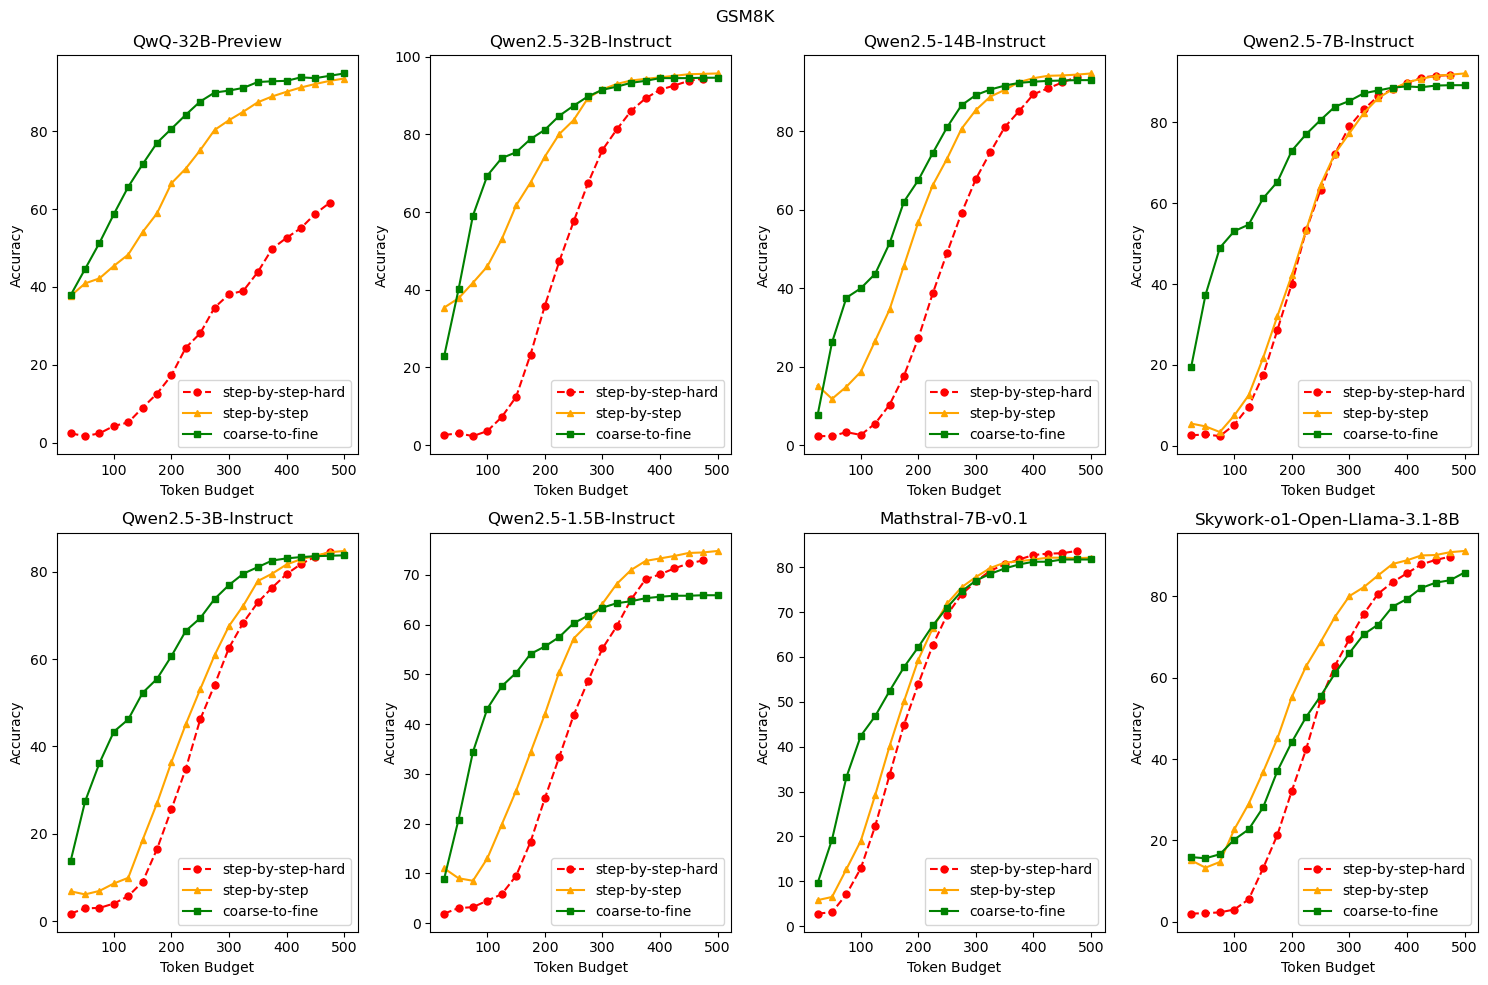

In [6]:
# Create a 2x3 subplot
fig, axs = plt.subplots(2, 4, figsize=(15, 10))
marker_size = 5  # Set the desired marker size

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot all lines first without labels
for index, model in enumerate(model_list):
    if dataset == "gsm8k":
        axs[index].plot(budget_list1[:-1], acc_lists1[index], marker='o', markersize=marker_size, 
                         linestyle='--', color="red", label="step-by-step-hard")
    else:
        axs[index].plot(budget_list1, acc_lists1[index], marker='o', markersize=marker_size, 
                         linestyle='--', color="red", label="step-by-step-hard")
    axs[index].plot(budget_list1, acc_lists2[index], marker='^', markersize=marker_size, 
                     linestyle='-', color="orange", label="step-by-step")
    axs[index].plot(budget_list1, acc_lists3[index], marker='s', markersize=marker_size, 
                     linestyle='-', color="green", label="coarse-to-fine")
    axs[index].set_xlabel("Token Budget")
    axs[index].set_ylabel("Accuracy")
    axs[index].set_title(f"{model.split('/')[-1]}")
    axs[index].legend()

# set the title
plt.suptitle(f"{dataset}".upper())
# Adjust layout
plt.tight_layout()

